# Análisis Exploratorio

### Importar librerias

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math
import nbformat

### Cargar Archivo CSV

In [2]:
df=pd.read_csv("datos_apartamentos_rent.csv")

### Ánalisis Descriptivo

In [3]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9.990000e+03,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,376951.620420,-9.465225e+05,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,54958.509131,1.575980e+05,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,213155.000000,-1.580221e+06,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,336798.500000,-1.013017e+06,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,388098.000000,-9.365160e+05,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,413498.000000,-8.220998e+05,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,615940.000000,-7.019160e+05,1.577362e+09


### Histogramas

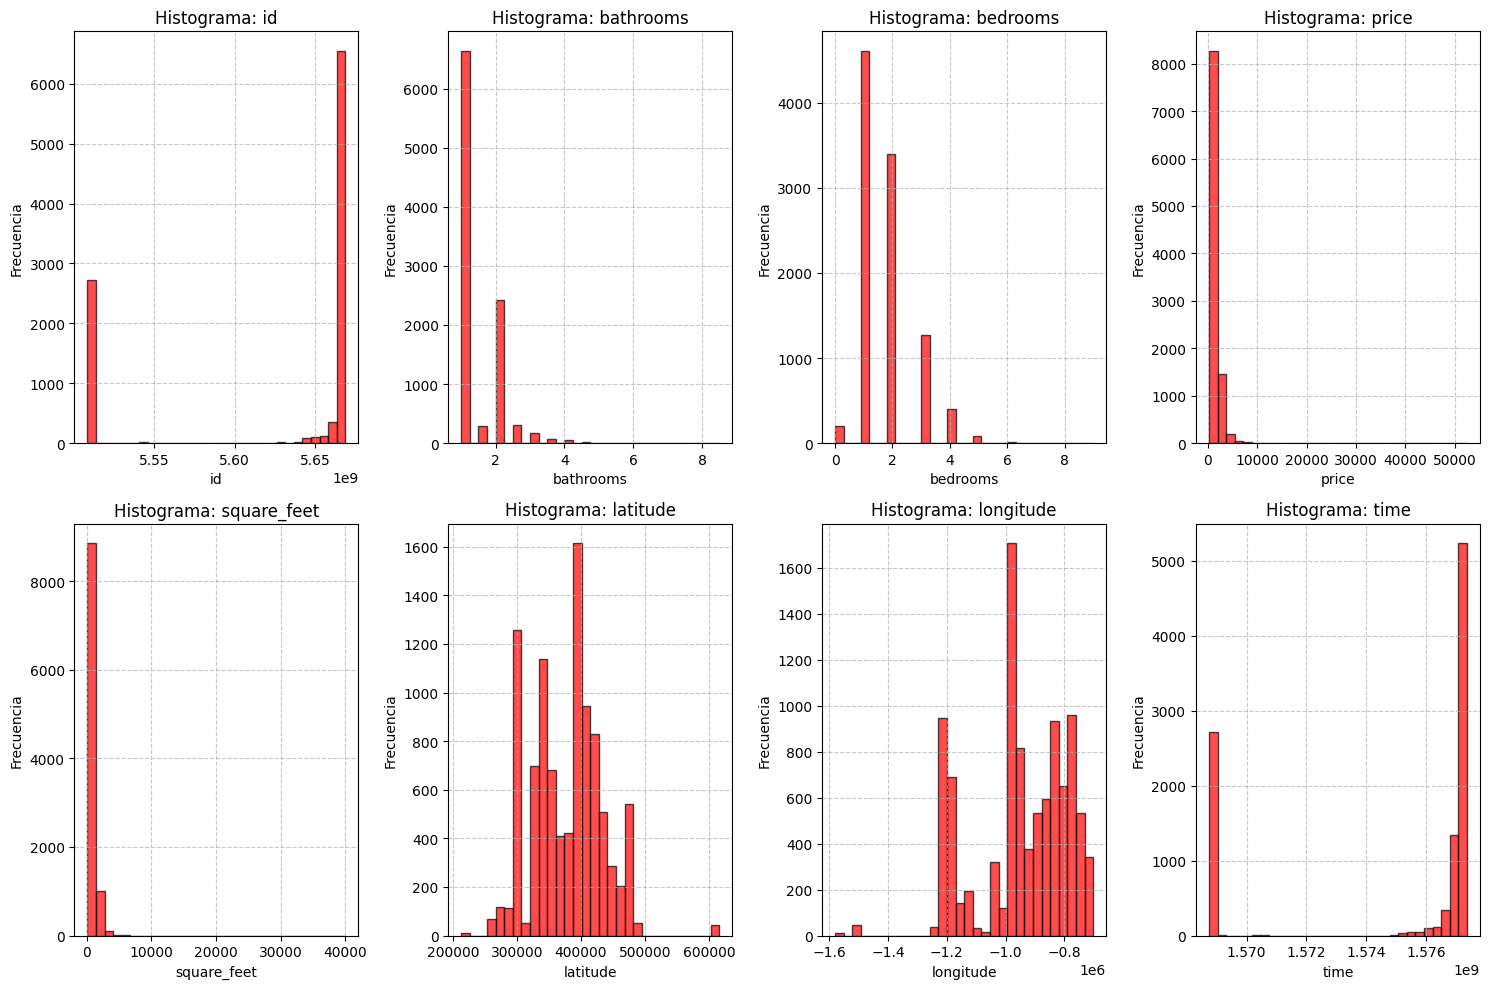

In [4]:
# Seleccionar solo variables numéricas
num_variables = df.select_dtypes(include=['float64', 'int64'])

# Definir el número de columnas y filas para la matriz de histogramas
num_vars = len(num_variables.columns)
cols = 4  # Número de columnas en la matriz
rows = math.ceil(num_vars / cols)  # Número de filas

# Crear la matriz de subplots
plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(num_variables.columns, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[column], bins=30, alpha=0.7, color='red', edgecolor='black')
    plt.title(f'Histograma: {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajuste automático del espacio entre gráficos
plt.show()


# Diagramas de Caja

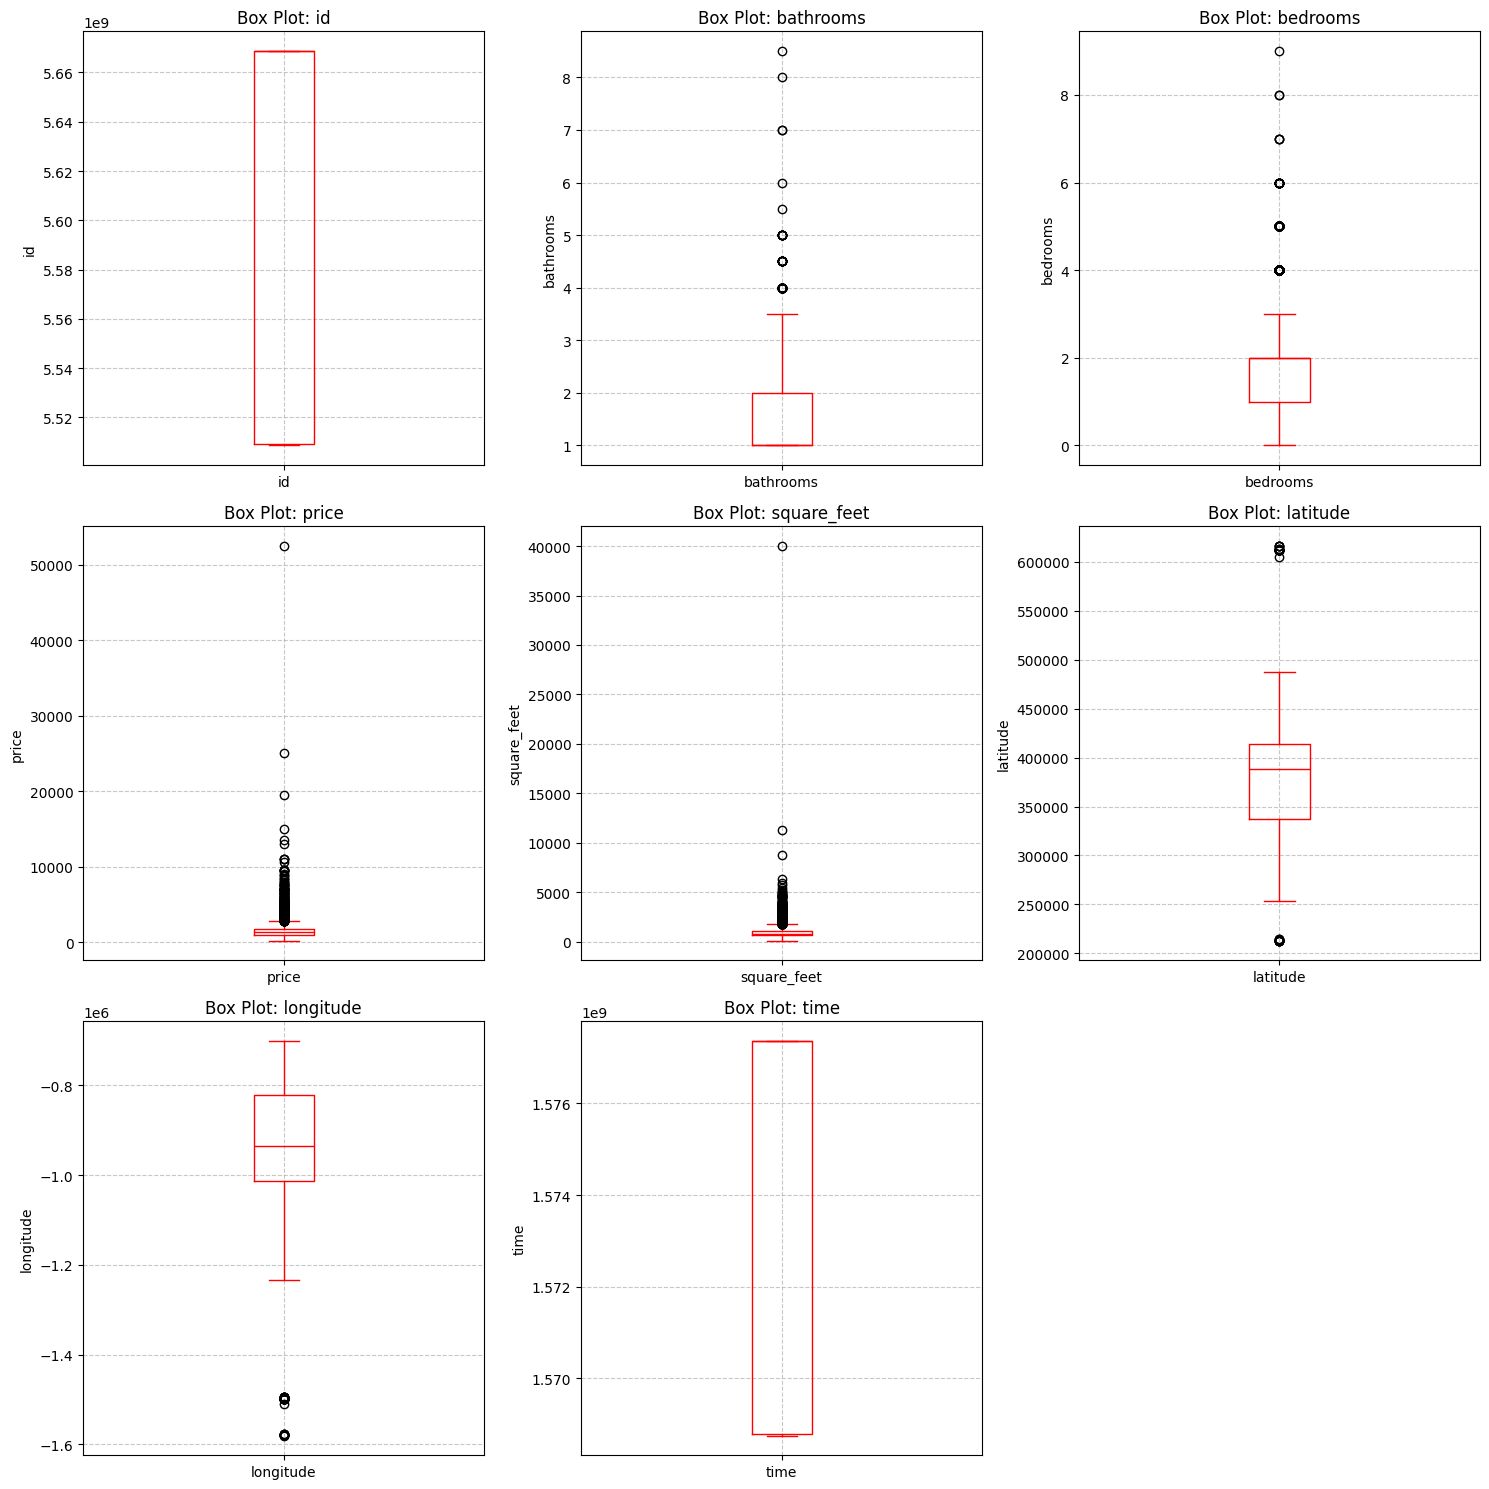

In [5]:
# Definir el número de columnas y filas para la matriz de diagramas de caja
num_vars = len(num_variables.columns)
cols = 3  # Número de columnas en la matriz
rows = math.ceil(num_vars / cols)  # Número de filas

# Crear la matriz de subplots para diagramas de caja
plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(num_variables.columns, 1):
    plt.subplot(rows, cols, i)
    num_variables[column].plot(kind='box', color='red')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajuste automático del espacio entre gráficos
plt.show()
